In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\nikit\OneDrive\Desktop\PDF\DL\rainfall.csv")
df

,date,rainfall
0,01-01-2010,2.9
1,02-01-2010,10.2
2,03-01-2010,0.9
3,04-01-2010,48.6
4,05-01-2010,9.6
...,...,...
3769,27-04-2020,0.0
3770,28-04-2020,8.4
3771,29-04-2020,5.4
3772,30-04-2020,3.2


In [3]:
df.shape

(3774, 2)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [5]:
training_set = df.iloc[:, 1:2].values
training_set

array([[ 2.9],
       [10.2],
       [ 0.9],
       ...,
       [ 5.4],
       [ 3.2],
       [ 5.2]])

In [6]:
training_set.shape

(3774, 1)

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(30, 3774):
    X_train.append(training_scaled[i-30:i, 0])
    y_train.append(training_scaled[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape, y_train.shape

((3744, 30), (3744,))

In [11]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape, y_train.shape

((3744, 30, 1), (3744,))

In [14]:
model2=Sequential()
model2.add(LSTM(units=30,return_sequences=True,input_shape=(X_train.shape[1],1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 30, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 30, return_sequences = True))
model2.add(Dropout(rate = 0.2))

model2.add(LSTM(units = 30, return_sequences = False))
model2.add(Dropout(rate = 0.2))

model2.add(Dense(units = 1))

model2.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 30)            3840      
                                                                 
 dropout_4 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 30)            7320      
                                                                 
 dropout_5 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_6 (LSTM)               (None, 30, 30)            7320      
                                                                 
 dropout_6 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 30)               

In [15]:
model2.fit(X_train,y_train,batch_size=32,epochs=30)

Epoch 1/30
117/117 [==============================] - 7s 23ms/step - loss: 0.0084 - accuracy: 0.4041
Epoch 2/30
117/117 [==============================] - 3s 25ms/step - loss: 0.0083 - accuracy: 0.4041
Epoch 3/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0083 - accuracy: 0.4041
Epoch 4/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0083 - accuracy: 0.4041
Epoch 5/30
117/117 [==============================] - 3s 25ms/step - loss: 0.0083 - accuracy: 0.4041
Epoch 6/30
117/117 [==============================] - 3s 26ms/step - loss: 0.0082 - accuracy: 0.4041
Epoch 7/30
117/117 [==============================] - 3s 29ms/step - loss: 0.0082 - accuracy: 0.4041
Epoch 8/30
117/117 [==============================] - 3s 28ms/step - loss: 0.0082 - accuracy: 0.4041
Epoch 9/30
117/117 [==============================] - 3s 28ms/step - loss: 0.0082 - accuracy: 0.4041
Epoch 10/30
117/117 [==============================] - 4s 31ms/step - loss: 0.0082 - accura

In [16]:
test=pd.read_csv(r"C:\Users\nikit\OneDrive\Desktop\PDF\IS\rainfalltest.csv")
test

,date,rainfall
0,01-01-2010,2.9
1,02-01-2010,10.2
2,03-01-2010,0.9
3,04-01-2010,48.6
4,05-01-2010,9.6
...,...,...
3769,NaN,NaN
3770,NaN,NaN
3771,NaN,NaN
3772,NaN,NaN


In [17]:
test.dropna()

,date,rainfall
0,01-01-2010,2.9
1,02-01-2010,10.2
2,03-01-2010,0.9
3,04-01-2010,48.6
4,05-01-2010,9.6
...,...,...
995,22-09-2012,0.0
996,23-09-2012,0.0
997,24-09-2012,0.0
998,25-09-2012,0.0


In [18]:
real_rain = test.iloc[:, 1:2].values

In [19]:
dataset_total = pd.concat((df['rainfall'], test['rainfall']), axis = 0)

In [20]:
len(dataset_total),len(test)

(7548, 3774)

In [21]:
inputs = dataset_total[len(dataset_total) - len(test) - 30:].values

In [22]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [23]:
X_test = []

for i in range(30, 1030):
    X_test.append(inputs[i-30:i, 0])

In [24]:
X_test = np.array(X_test)
# Reshape to a new dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [26]:
predicted_rain = model2.predict(X_test)
predicted_rain1 = sc.inverse_transform(predicted_rain)

32/32 [==============================] - 0s 10ms/step


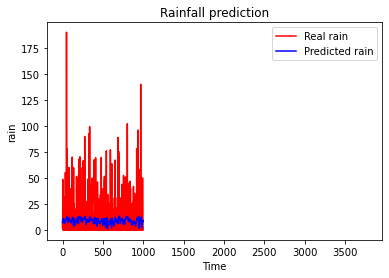

In [28]:
plt.plot(real_rain, color = 'red', label = 'Real rain')
plt.plot(predicted_rain1, color = 'blue', label = 'Predicted rain')
plt.title('Rainfall prediction')
plt.xlabel('Time')
plt.ylabel('rain')
plt.legend()
plt.show()

In [29]:
model2.evaluate(X_train,y_train)

117/117 [==============================] - 3s 11ms/step - loss: 0.0081 - accuracy: 0.4041


[0.008092397823929787, 0.404113233089447]